## Plot GloVe Training Loss
Here we parse the output of `create_embeddings.sh` and plot the loss for each set of word dimensions.
To record a `train.out` file to plot with this notebook run:
```
create_embeddings.sh &> train.out
```

In [5]:
import re
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
def parse_training_output(file):
    with open(file, 'r') as f:
        text = f.read()
    # Match "vector size: XXX"
    dim_match = '^vector size: \d+$'
    dim_regex = re.compile(dim_match, re.MULTILINE)
    dim_matches = dim_regex.finditer(text)

    dim_spans = [m.span() for m in dim_matches]
    dims = [int(text[start + 13:end]) for start, end in dim_spans]
    
    grouped_by_dim = []
    i = dim_spans[0][0]
    for j, _ in enumerate(dim_spans):
        if j < len(dim_spans) - 1:
            stop = dim_spans[j + 1][1]
            grouped_by_dim.append(text[i:stop])
        else:
            grouped_by_dim.append(text[i:])
        i = stop

    grouped_by_dim = list(zip(dims, grouped_by_dim))
    
    # Match the output of each iteration
    iter_match = '\d{2}\/\d{2}/\d{2} - \d{2}:\d{2}\.\d{2}[APM]{2}, iter: \d{2,3}, cost: [0-9.]+$'
    iter_regex = re.compile(iter_match, re.MULTILINE)
    
    final = {}
    for dim, group in grouped_by_dim:
        iter_matches = iter_regex.finditer(group)
        g_spans = [m.span() for m in iter_matches]
        g = [float(group[start + 40:stop]) for start, stop in g_spans]
        final[dim] = g

    return final


In [10]:
results = parse_training_output('../data/embeddings/train.out')


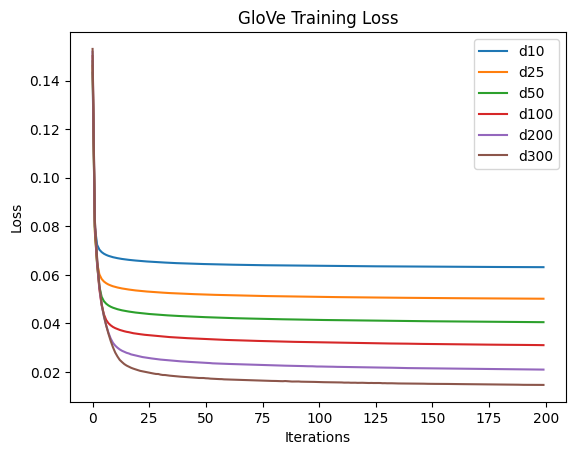

In [11]:
for k, v in results.items():
    plt.plot(v, label='d{}'.format(k))
plt.title('GloVe Training Loss')
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.legend()
plt.show()
